# Concordance analysis
Check if the SNVs called by comparing *sample to reference* are accounted for when comparing *sample to isolate* and *isolate to reference*.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
sns.set_theme(style="white")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np

In [2]:
SNV_overlap = pd.read_csv('../data/SNV_s2i_s2r_i2r.csv')
metadata = pd.read_csv('../data/sampleinfo.txt',sep='\t').iloc[:-1].set_index('SAM id')
SNV_overlap

,SAM id,species,sample2ref_count,sample2isolate_count,isolate2ref_count,overlap12,overlap13,overlap23,overlap123,consensus,consensus_overlap2,consensus_overlap3,consensus_overlap4,consensus_overlap5,rare,rare_overlap2,rare_overlap3,rare_overlap4,rare_overlap5
0,MBH047,E_coli,38700.0,33133.0,116293.0,15189.0,22401.0,9078.0,8240.0,21031.0,275.0,20477.0,390.0,20953.0,10287.0,9486.0,4326.0,40.0,9861.0
1,MHH535,E_coli,512.0,225.0,113174.0,14.0,71.0,22.0,1.0,361.0,9.0,67.0,43.0,118.0,29.0,2.0,2.0,0.0,4.0
2,MHH328,E_coli,36998.0,212.0,114511.0,60.0,36694.0,22.0,40.0,35570.0,26.0,35550.0,6.0,35556.0,350.0,22.0,116.0,0.0,136.0
3,MHH328,K_pneumoniae,10382.0,3594.0,44439.0,1403.0,8092.0,282.0,666.0,6612.0,13.0,6414.0,71.0,6486.0,871.0,627.0,61.0,4.0,664.0
4,MHH271,E_coli,903.0,2676.0,108900.0,484.0,205.0,1080.0,102.0,192.0,40.0,142.0,2.0,182.0,379.0,241.0,66.0,11.0,265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,MHH577,E_coli,69.0,34.0,108240.0,0.0,12.0,0.0,0.0,13.0,0.0,6.0,0.0,6.0,25.0,0.0,2.0,0.0,2.0
114,MHH579,K_pneumoniae,25096.0,69.0,43250.0,19.0,24652.0,22.0,15.0,24568.0,3.0,24346.0,184.0,24531.0,272.0,10.0,112.0,71.0,191.0
115,MBH086,E_coli,31420.0,1518.0,114822.0,225.0,30159.0,82.0,78.0,30262.0,48.0,29881.0,354.0,30241.0,709.0,147.0,167.0,2.0,300.0
116,MBH086,K_pneumoniae,22836.0,25851.0,46355.0,10242.0,11008.0,12669.0,147.0,21995.0,10015.0,11075.0,542.0,21510.0,653.0,143.0,43.0,33.0,198.0


In [3]:
coverage = []
for ind, data in SNV_overlap.iterrows():
    coverage.append(metadata.loc[data['SAM id'], f'{data["species"]}_coverage'])

SNV_overlap['coverage'] = coverage
SNV_overlap = SNV_overlap[SNV_overlap['coverage'] < 4]

In [4]:
consensus = SNV_overlap[['SAM id', 'species', 'consensus', 'consensus_overlap2', 'consensus_overlap3', 'consensus_overlap4', 'consensus_overlap5']].rename(columns=\
{'consensus': 'total',\
'consensus_overlap2': 's2i',\
'consensus_overlap3': 'i2r',\
'consensus_overlap4': 'uncovered',\
'consensus_overlap5': 's2i+i2r+uncovered'})

In [5]:
rare = SNV_overlap[['SAM id', 'species', 'rare', 'rare_overlap2', 'rare_overlap3', 'rare_overlap4', 'rare_overlap5']].rename(columns=\
{'rare':'total',\
'rare_overlap2': 's2i',\
'rare_overlap3': 'i2r',\
'rare_overlap4': 'uncovered',\
'rare_overlap5': 's2i+i2r+uncovered'})

In [6]:
total = rare+consensus
total[['SAM id', 'species']] = rare[['SAM id', 'species']]

,total,s2i,i2r,uncovered,s2i+i2r+uncovered,concordance
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,6854.643836,5627.438356,2395.712329,244.589041,6166.315068,0.692606
std,9817.688151,8679.002039,4046.473542,1313.860013,9187.396504,0.233815
min,30.000000,2.000000,19.000000,0.000000,23.000000,0.255605
25%,432.000000,59.000000,102.000000,1.000000,191.000000,0.433004
50%,871.000000,275.000000,194.000000,6.000000,431.000000,0.758741
75%,11874.000000,9584.000000,3561.000000,77.000000,10634.000000,0.904110
max,46413.000000,40193.000000,18576.000000,11161.000000,42222.000000,0.987811


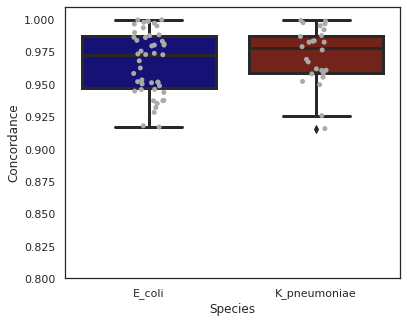

In [7]:
# Change Color
newcolors = np.array([[6/255,1/255,133/255,1],[128/255,24/255,13/255,1]])
newcmp = ListedColormap(newcolors)
total['concordance'] = total['s2i+i2r+uncovered']/total['total']
data = total
ec = data[data['species']=='E_coli']
kp = data[data['species']=='K_pneumoniae']
concordance = pd.concat([ec['s2i+i2r+uncovered']/ec['total'], kp['s2i+i2r+uncovered']/kp['total']],axis=1).rename(columns={0:'E_coli',1:'K_pneumoniae'})
concordance_long = pd.melt(concordance, value_vars=['E_coli', 'K_pneumoniae'], var_name='Species', value_name='Concordance', ignore_index=True)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
sns.boxplot(ax=ax, x='Species', y='Concordance', data=concordance_long, palette=newcolors,linewidth=3)
sns.stripplot(ax=ax, x = 'Species', y = 'Concordance', data = concordance_long, color='#aaaaa9')

ax.set(ylim=[0.8,1.01])
fig.savefig(f'/home/jovyan/GIS/cre/reports/concordance_total_VCF.pdf')

total.describe()
rare['concordance'] = rare['s2i+i2r+uncovered']/rare['total']
rare.describe()